
# einlesen datensatz - descriptive analyse


In [1]:

# abwanderungsquote bei IBM

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:

df = pd.read_csv("Churn.csv")


In [3]:

df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:

# spalte löschen
df.drop("customerID",axis=1,inplace=True)


In [5]:

# nullwerte überprüfen
df.isnull().sum()


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:

# leere zeilen in einer spalte:
df[df["TotalCharges"] == " "]


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [7]:

# leere zellen ergänzen bei "TotalCharges":
def leer_ergaenzen(x):
    if x == " ":
        return 0
    else:
        return x


In [8]:

# spalte mit aufgerufener funktion ergänzen:
df["TotalCharges"] = df["TotalCharges"].apply(leer_ergaenzen)


In [9]:

# überprüfen. ob funktion erfolgreich:
df[df["TotalCharges"] == " "]


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [10]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [11]:

df.describe()


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [12]:

# sicherheitshalber alle NaN-werte löschen:
df.dropna(inplace=True)



# explorative datenanalyse


In [13]:

# datentyp in zahl umwandeln:
# bei error --> NaN-wert mit "coerce"
pd.to_numeric(df["TotalCharges"],errors="coerce")


0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

<Axes: xlabel='Churn', ylabel='count'>

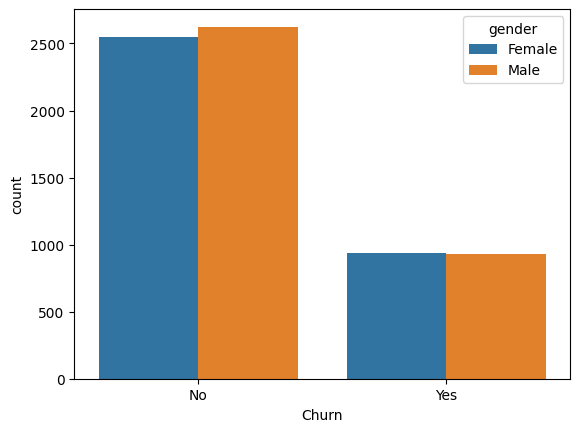

In [14]:

sns.countplot(x = "Churn",data=df,hue="gender")


<Axes: xlabel='Partner', ylabel='count'>

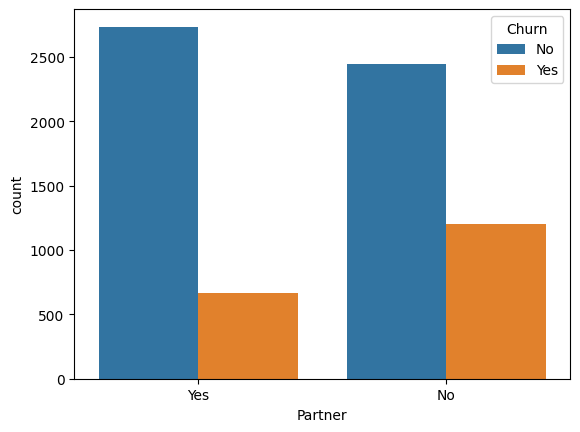

In [15]:

sns.countplot(x = "Partner",data=df,hue="Churn")


<Axes: xlabel='MonthlyCharges', ylabel='Count'>

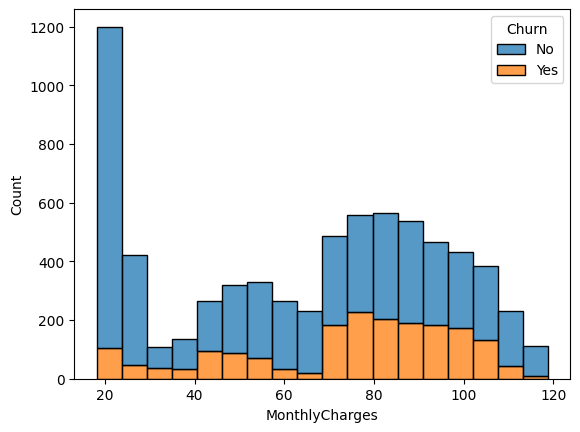

In [16]:

# numerische werte:
sns.histplot(x="MonthlyCharges",data=df, hue="Churn",multiple="stack")


<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

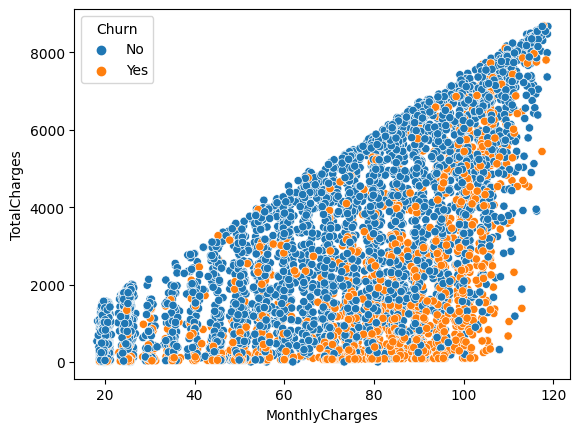

In [17]:

sns.scatterplot(x="MonthlyCharges",y=pd.to_numeric(df["TotalCharges"],errors="coerce"),data=df,hue="Churn")


In [18]:

df["TotalCharges"] = pd.to_numeric(df["TotalCharges"])


<Axes: >

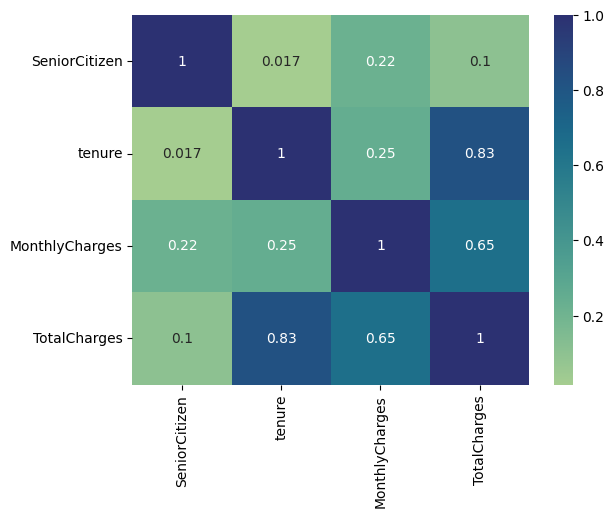

In [19]:

sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="crest")



# visueller report mit ydata_profiling


In [20]:

import ydata_profiling as pp


In [21]:

pp.ProfileReport(df)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [22]:

df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [23]:

# kategorische ja/nein-werte in numerische werte umwandeln mit --> ".get_dummies()"
df_dummies = pd.get_dummies(df,drop_first=True,dtype=int)


In [24]:

df_dummies.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


In [25]:

# features
X = df_dummies.drop("Churn_Yes",axis=1)
# label
y = df_dummies["Churn_Yes"]


In [26]:

X


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1,1,1,1,0,1,...,0,1,0,1,1,0,1,0,0,1
7039,0,72,103.20,7362.90,0,1,1,1,0,1,...,0,1,0,1,1,0,1,1,0,0
7040,0,11,29.60,346.45,0,1,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
7041,1,4,74.40,306.60,1,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1


In [27]:

y


0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn_Yes, Length: 7043, dtype: int32

In [28]:

# train-/test-daten:
from sklearn.model_selection import train_test_split


In [29]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [30]:

# alle X-daten standardisieren:
from sklearn.preprocessing import StandardScaler


In [31]:

scaler = StandardScaler()


In [32]:

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [33]:

X_train


array([[-0.43441055,  0.30741281,  0.32802721, ..., -0.52256167,
         1.39928329, -0.54027294],
       [-0.43441055, -0.9165312 , -1.16355736, ..., -0.52256167,
        -0.71465157,  1.85091631],
       [-0.43441055, -0.22296293, -1.50624106, ..., -0.52256167,
        -0.71465157,  1.85091631],
       ...,
       [-0.43441055, -0.83493493, -1.44002198, ..., -0.52256167,
         1.39928329, -0.54027294],
       [ 2.3019699 , -0.83493493,  1.15245465, ..., -0.52256167,
         1.39928329, -0.54027294],
       [-0.43441055, -0.26376106, -1.48471986, ...,  1.91364974,
        -0.71465157, -0.54027294]])

In [34]:

X_test


array([[-0.45101679, -1.26486514, -1.34675163, ..., -0.53008654,
         1.42108428, -0.55399819],
       [-0.45101679,  0.35776343, -1.33167727, ..., -0.53008654,
        -0.70368803, -0.55399819],
       [-0.45101679,  0.80398629, -1.52931898, ..., -0.53008654,
        -0.70368803,  1.80506004],
       ...,
       [-0.45101679, -1.02147086,  0.81558276, ...,  1.88648444,
        -0.70368803, -0.55399819],
       [-0.45101679, -0.007328  ,  1.13381943, ...,  1.88648444,
        -0.70368803, -0.55399819],
       [-0.45101679,  1.08794629,  0.99647518, ..., -0.53008654,
         1.42108428, -0.55399819]])

In [35]:

# algorithmus importieren:
from sklearn.svm import SVC


In [36]:

svc = SVC()


In [37]:

# trainieren:
svc.fit(X_train,y_train)


SVC()

In [38]:

pred = svc.predict(X_test)


In [39]:

pred


array([0, 0, 0, ..., 0, 0, 0])

In [40]:

# accuracy:
from sklearn.metrics import classification_report,confusion_matrix


In [41]:

print(confusion_matrix(y_test,pred))


[[1558  139]
 [ 312  316]]


In [42]:

print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1697
           1       0.69      0.50      0.58       628

    accuracy                           0.81      2325
   macro avg       0.76      0.71      0.73      2325
weighted avg       0.80      0.81      0.80      2325




# mit hyperparameter tunen --> gamma,C


In [43]:

from sklearn.model_selection import GridSearchCV


In [44]:

hyp_para = {"C":[0.1,1,10,100],"gamma":[0.1,0.01,0.001,0.0001]}


In [45]:

# zum initialisieren: --> algorithmus,hyperparameter(unserer),refit(aktualisiert immer),verbose(anz. messages)
grd = GridSearchCV(SVC(),hyp_para,refit=True,verbose=2)


In [46]:

grd.fit(X_train,y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.7s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.7s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.7s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.7s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.7s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.6s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.6s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.6s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.6s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.6s
[CV] END .................................C=0.1, gamma=0.001; total time=   0.6s
[CV] END .................................C=0.1,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.1, 0.01, 0.001, 0.0001]},
             verbose=2)

In [47]:

# beste parameter ausgeben:
grd.best_params_


{'C': 10, 'gamma': 0.001}

In [48]:

# vorhersagen:
pred_02 = grd.predict(X_test)


In [49]:

print(confusion_matrix(y_test,pred_02))
print(classification_report(y_test,pred_02))


[[1540  157]
 [ 288  340]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1697
           1       0.68      0.54      0.60       628

    accuracy                           0.81      2325
   macro avg       0.76      0.72      0.74      2325
weighted avg       0.80      0.81      0.80      2325




# vergleich mit weiteren algorithmen:


In [51]:

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate          # validierungen
from sklearn.model_selection import cross_val_score         # validierungen


In [52]:

# initialisieren und fitten in einer zeile:
log = LogisticRegression().fit(X_train,y_train)
# ellbow-methode mit default: k=5
knn = KNeighborsClassifier().fit(X_train,y_train)
dtc = DecisionTreeClassifier().fit(X_train,y_train)
rfc = RandomForestClassifier().fit(X_train,y_train)
#zum vergleich SVC mit bestem C und gamma:
svc = SVC(C=10,gamma=0.001).fit(X_train,y_train)


In [53]:

#models in liste speichern:
models = [log,knn,dtc,rfc,svc]
model_names = ["LogisticRegression","KNeighborsClassifier","DecisionTreeClassifier","RandomForestClassifier","SVC"]


In [68]:

# über for schleife werte in listen speichern:
accuracy_scores = []
precision_scores = []
recall_scores = []
error_rate = []

for i,m in enumerate(models):
    y_pred = m.predict(X_test)
    conf_matrix = confusion_matrix(y_test,y_pred)
    
    print(model_names[i])
    print(classification_report(y_test,y_pred))
    
    true_positiv = conf_matrix[0,0]
    true_negativ = conf_matrix[1,1]
    false_positiv = conf_matrix[0,1]
    false_negativ = conf_matrix[1,0]
    
    # werte: "accuracy","precision","recall","error"
    total = true_positiv + true_negativ + false_positiv + false_negativ
    accuracy = (true_positiv + true_negativ) / total
    precision = true_positiv / (true_positiv + false_positiv)
    recall = true_positiv / (true_positiv + false_negativ)
    error = (false_positiv + false_negativ) / total
    
    accuracy_scores.append(accuracy.round(2))
    precision_scores.append(precision.round(2))
    recall_scores.append(recall.round(2))
    error_rate.append(error.round(2))

# tabelle erzeugen mit den Listen der einzelnen werte:
ergebnisse_df = pd.DataFrame(list(zip(accuracy_scores,precision_scores,recall_scores,error_rate)),
                            index=model_names,columns=["accuracy","precision","recall","error"])

ergebnisse_df


LogisticRegression
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1697
           1       0.69      0.57      0.63       628

    accuracy                           0.82      2325
   macro avg       0.77      0.74      0.75      2325
weighted avg       0.81      0.82      0.81      2325

KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1697
           1       0.56      0.53      0.55       628

    accuracy                           0.76      2325
   macro avg       0.70      0.69      0.69      2325
weighted avg       0.76      0.76      0.76      2325

DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1697
           1       0.51      0.54      0.53       628

    accuracy                           0.74      2325
   macro avg       0.67      0.68      0.67      2325
weighted av

,accuracy,precision,recall,error
LogisticRegression,0.82,0.91,0.85,0.18
KNeighborsClassifier,0.76,0.85,0.83,0.24
DecisionTreeClassifier,0.74,0.81,0.83,0.26
RandomForestClassifier,0.80,0.91,0.83,0.20
SVC,0.81,0.91,0.84,0.19
